In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
x = np.linspace(-2, 2, 9)
print(x)
y = np.linspace(-5, 5, 11)
print(y)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [8]:
x_1, y_1 = np.meshgrid(x, y)
print("x_1 Matrix: ")
print(x_1)
print("y_1 Matrix: ")
print(y_1)

x_1 Matrix: 
[[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]]
y_1 Matrix: 
[[-5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.]]


# SVM iris data

In [10]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [30]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
index = np.random.choice(np.arange(start=0, stop=149), 10, replace=False)
print(y[index])

X.shape: (150, 2)
y.shape: (150,)
[1 0 0 1 2 1 2 0 2 1]


In [31]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Numpy ravel() function returns the 1D array containing all the elements of input array with shape (a.size ()).
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)

In [32]:
model = svm.SVC(kernel="linear")
clf = model.fit(X, y)

No handles with labels found to put in legend.
xx.shape: (220, 280)


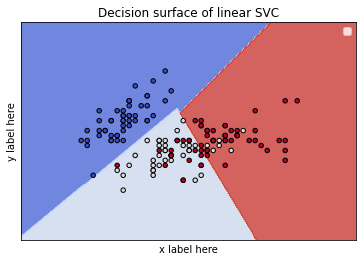

In [40]:
fig, ax = plt.subplots()
#title for the plots
title = ("Decision surface of linear SVC")
# Setup grid for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
print("xx.shape: {}".format(xx.shape))

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlabel("x label here")
ax.set_ylabel("y label here")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

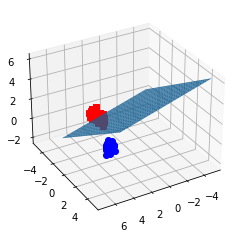

In [51]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

## Tóm tắt và thảo luận
1. Với bài toán binary classification mà 2 classes là linearly separable, có vô số các hyper plane giúp phân biệt 2 classes, tức mặt phân cách. Với mỗi mặt phân cách, ta có 1 classifier. Khoảng cách từ 1 điểm data tới mặt phân cách ấy được gọi là margin của classifier đó.

2. Support Vector Machine là bài toán đi tìm mặt phân cách sao cho margin tìm được là lớn nhất, đồng nghĩa với việc các điểm data an toàn nhất so với mặt phân cách

3. Bài toán tối ưu trong SVM là 1 convex function, với hàm mục tiêu là stricly convex, nghiệm của bài toán này là duy nhất. Hơn nữa, bài toán tối ưu dó là 1 Quadratic Programming (QP)

4. Mặc dù có thể trực tiếp giải SVM thông qua bài toán tối ưu gốc này, thông thường người ta giải bài toán đối ngẫu. Bài toán đối ngẫu cũng là một QP nhưng nghiệm là sparese nên có những phương pháp hiệu quả hơn.

Với những bài toán gần linearly separable hoặc nonlinear separable, có những cải tiến khác của SVM để tích nghĩ với dữ liệu đó.